<a href="https://colab.research.google.com/github/Pumafi/geostats_deep_learning/blob/main/TP_BackProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Neural Networks


## Requirements

In [ ]:
!pip install mnist

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sys 

### Automatic differentiation

The autograd package allows automatic differentiation.

**Example :**

$$f(x) = 2\sqrt{x} + 1$$

$$f'(x) = \frac{1}{\sqrt{x}}$$

In [ ]:
# Imports

import autograd
import autograd.numpy as np

In [ ]:
# Example

def test_function(x):
    return 2.* np.sqrt(x) + 1.

def hardcoded_derivative(x):
    return 1 / np.sqrt(x)

autograd_derivative = autograd.grad(test_function)

In [ ]:
# Verify that the autograd derivative andhardcoded derivative are equal to the 14th decimals
assert round(autograd_derivative(2.), 14) == round(hardcoded_derivative(2.), 14)

print(autograd_derivative(2.)) # Round up
print(hardcoded_derivative(2.)) # Round down

0.7071067811865476
0.7071067811865475


### Display **functions**

In [ ]:
def displayFunc(f, xmin=-5., xmax=5., by=0.02):
    """
    Display the function f and its derivative f' between
    intervalle xmin and xmax with step by

    This function uses the Abstract Class Function which
    will be defined a bit further down.
    """
    t = np.arange(xmin, xmax, by)

    plt.subplot(1, 2, 1)
    plt.plot(t, f.eval(t))
    plt.title(type(f).__name__)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t, f.eval_deriv(t))
    plt.grid(True)
    plt.title("Derivative of " + type(f).__name__)

    plt.show()

In [ ]:
def display1D(NN, xmin=-4., xmax=4., n=100):
    """
    Display the output of a MultiLayers Perceptron over 1D
    """
    x = np.linspace(xmin, xmax, n)
    y = NN.forward(x)
    plt.plot(x, y[0,:])


In [ ]:
def displayClassif(NN, xmin=-5., xmax=5., n=100, end=True):
    """
    Display the output of a MultiLayers Perceptron as Classication Areas
    The input of the NN must be 2D
    """
    discr = np.linspace(xmin, xmax, n)
    x=np.array([(i, j) for i in discr for j in discr]).T
    output = np.reshape(NN.forward(x), (len(discr), len(discr)))
    classif = (output>0.5).astype(float)

    fig, (ax1,ax2) = plt.subplots(figsize=(13, 4), ncols=2)
    pos = ax1.imshow(output.T,extent=[min(discr), max(discr), min(discr), max(discr)],origin='lower')
    fig.colorbar(pos, ax=ax1)
    ax1.set_title("Neural network output")

    pos = ax2.imshow(classif.T,extent=[min(discr), max(discr), min(discr), max(discr)],origin='lower')
    fig.colorbar(pos)
    ax2.set_title("Classification")
    if end:
        plt.show()
    

In [ ]:
def view_classify(img, ps):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.reshape(1, 28, 28).squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

### Activation functions

Our first step will be to code the NN activation
functions.


1.   Defining the abstract Activation class
2.   Defining some of the classical Activation functions




#### Abstract class


In [ ]:
from abc import ABC, abstractmethod

class Activation(ABC):
    def __init__(self):
        self.deriv = autograd.elementwise_grad(self.eval)
        pass

    @abstractmethod
    def eval(self, x):
        pass
    
    def eval_deriv(self, x):
        return self.deriv(x)
        

#### Identity function

$$f(x) = x$$

$$f'(x) = 1$$

1) ***Using the abstract class inheritence allows you to not specify the derivative.***

Since the subclass will use the parent's function, and since the parent's function uses the autograd, this option is perfect for lazy coders.

In [ ]:
class IdentityLazy(Activation):
    def eval(self,x):
        return x

In [ ]:
uLazy = IdentityLazy()
uLazy.eval_deriv(4.)

array(1.)

2) ***However, if the derivative is known, it is useless (and possibly time consuming) to make your activation inherit from Activation.***

In [ ]:
class Identity():
    def eval(self, x):
        return x
    
    def eval_deriv(self, x):
        return np.ones_like(x)

In [ ]:
u = Identity()
u.eval_deriv(4.)

array(1.)

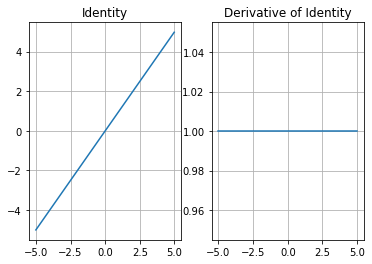

In [ ]:
displayFunc(u)

Proof that autograd is slower :

In [ ]:
%timeit uLazy.eval_deriv(4.)

The slowest run took 9.77 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 22.2 µs per loop


In [ ]:
%timeit u.eval_deriv(4.)

The slowest run took 16.51 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.86 µs per loop


#### Sigmoid (a.k.a logistic function)

$$f(x) = \frac{1}{1+e^{-x}}$$

$$f'(x) = f(x)  (1-f(x))$$

In [ ]:
class Sigmoid():
    def eval(self, x):
        # TODO: code here (replace the pass or None)
        pass

    def eval_deriv(self, x):
        # TODO: code here (replace the pass or None)
        pass

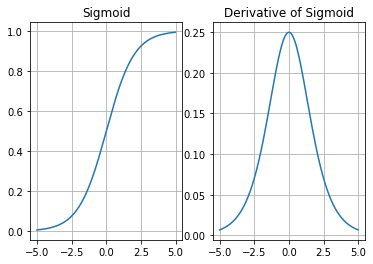

In [ ]:
displayFunc(Sigmoid())

#### SoftMax (for multi-label classification)

It is the inverse transformation of the centered log-ratio

$$f(x_1,\dots,x_K)=\frac{1}{\sum_{k=1}^K e^{x_k}}\left(\begin{array}{c} e^{x_1} \\ \vdots \\ e^{x_K}\end{array}\right)$$

If SoftMax is used for binary classification, it corresponds to the sigmoid function up to a reparametrization.

http://web.stanford.edu/~nanbhas//blog/sigmoid-softmax.html

#### Hyperbolic tangent

$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

$$f'(x) = 1 - f^2(x)$$

In [ ]:
class HyperbolicTangent():
    def eval(self,x):
        # TODO: code here (replace the pass or None)
        pass

    def eval_deriv(self,x):
        # TODO: code here (replace the pass or None)
        pass 

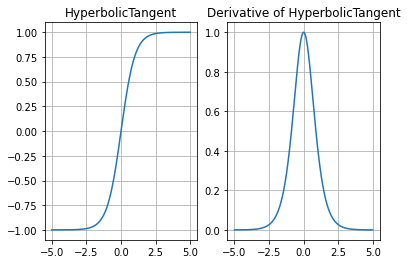

In [ ]:
displayFunc(HyperbolicTangent())

#### ReLU (Rectified Linear Unit)

$$f(x) = \max(0,x) = x \mathbb{1}_{]0,+\infty[}(x)$$

$$f'(x) = \mathbb{1}_{]0,+\infty[}(x)$$

In [ ]:
class ReLU():
    def eval(self, x):
        # TODO: code here (replace the pass or None)
        pass  # Do not make ReLu inherit from Activation
    
    def eval_deriv(self, x):
        # TODO: code here (replace the pass or None)
        pass    

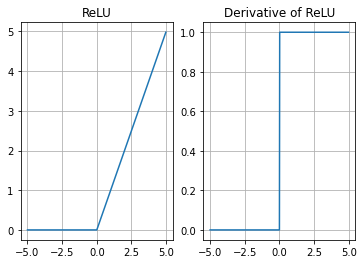

In [ ]:
displayFunc(ReLU())

#### Leaky ReLU

$$f(x) = \max(\varepsilon x,x)$$

$$f'(x) = \varepsilon\mathbb{1}_{]-\infty,0[}(x) + \mathbb{1}_{]0,+\infty[}(x)$$

In [ ]:
class LeakyReLU():
    def __init__(self, eps):
        self.eps = eps
            
    def eval(self, x):
        return x * self.evalderiv(x)   # Do not make LeakyReLu inherit from Activation

    def evalderiv(self, x):
        indic = (x >= 0).astype(float)
        # TODO: code here (replace the pass or None)
        return  None

## I. First implementation of the MultiLayer Perceptron class

In the following code, you will build the class for a layer.

A layer is specified by the dimension of the input (Ninput), the dimension of the ouput (Noutput), and an activation function (an object with a method "eval").

The forward function computes the output of a given layer from the input vector. Note that the input vector does not include the constant 1 for the bias term.

In [ ]:
# Q1

class DenseLayer:

    def __init__(self, input_dim=1, output_dim=1, activation=Identity(), seed=None, L=1):
        """
        input_dim: int, input dimension
        output_dim: int, output dimension
        activation: an activation class with both eval and eval_deriv functions
        seed: int, random seed
        L: random intervalle
        """
        self.activation=activation
        self.weights=None
        self.init_random_weights(input_dim, output_dim, seed, L)

        # Cached objects
        self.tildeV=None
        self.S=None
        self.grad=None

    def init_random_weights(self, input_dim=None, output_dim=None, seed=None, L=1):
        """
        Create and Fill the weights matrix with random uniform number on [-L,L]
        If specified, the seed of the numpy random number generator will be set to seed

        input_dim and output_dim should be left to None only if weights are already initiated
        """

        if seed is not None:
            np.random.seed(seed)

        if input_dim is None:
            # No security check, but we'll assume the code will be used correctly
            self.weights = L * (np.random.rand( self.weights.shape[0], self.weights.shape[1])-0.5)
        else:      
            # TODO: Your code (fill the None)
            self.weights = None
            # END

    def forward(self, V):
        """
        This function takes as entry a matrix (array) of size Ninput x N
        It returns the evaluation of the layer
        """
        V = np.atleast_2d(V) # See Glossary at the end of the notebook
        ones = np.ones(np.shape(V)[1])

        # TODO: Your code (fill the None)
        self.tildeV = np.row_stack((ones, V))
        self.S = None
        result = None
        # END

        return result

#### Test

After running the next chunk, "Success" has to be displayed. Otherwise, something is wrong

In [ ]:
# Code Verification
# (Do not edit)

A = DenseLayer(2, 1, Sigmoid(), seed=24)

# 10 data (x will also be generated using the seed)
x = np.random.rand(2, 10)
expected_result = [0.72189383, 0.68976893, 0.67507701,0.73000272, 0.69081288,
                   0.68102093, 0.72774888, 0.72015744, 0.66509593, 0.71445135]
res = A.forward(x)
assert np.all(abs(res - expected_result)< 1e-5)

# 2 data (x will also be generated using the seed)
x = np.random.rand(1, 2)
A = DenseLayer(1, 1, Sigmoid(), seed=24)
res = A.forward(x)
assert np.all(abs(res - [0.64467951, 0.65782785])< 1e-5)

# Sanity Check
print("Success")

Success


In [ ]:
ninput = 2
noutput = 1
ndata = 10
print("Weights :\n ", A.weights)

Weights :
  [[0.4600173  0.19951205]]


In [ ]:
class MultiLayerPerceptron:
    def __init__(self):
        self.layers = []

    def init_weights(self, seed=None, L=1):
        if seed is not None:
            np.random.seed(seed)

        for layer in self.layers:
            layer.init_random_weights(input_dim=None, output_dim=None, seed=seed, L=L)
            
    def add(self,layer):
        self.layers.append(layer)

    def forward(self, x):
        # TODO: code here (replace the pass or None)
        pass

### Linear Regression (1D)

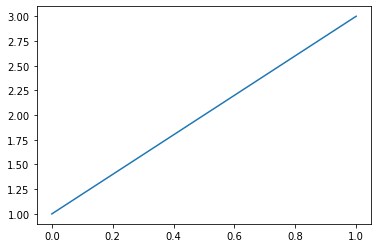

In [ ]:
NN = MultiLayerPerceptron()
A1 = DenseLayer(1, 1, Identity(), seed=9)
A1.weights[0][0] = 1.
A1.weights[0][1] = 2.
NN.add(A1)
display1D(NN, 0, 1)

### Non-linear Regression (1D)

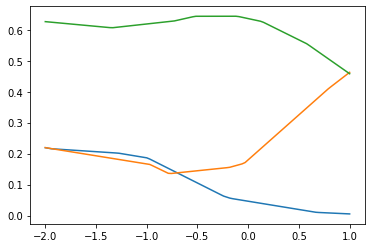

In [ ]:
NN = MultiLayerPerceptron()
A1 = DenseLayer(1, 12, ReLU(), seed=3)
NN.add(A1)
A2 = DenseLayer(12, 1, Identity())
NN.add(A2)
display1D(NN, -2, 1)
NN.init_weights(23)
display1D(NN, -2, 1)
NN.init_weights(24)
display1D(NN, -2, 1)

### Logistic Regression (2D)

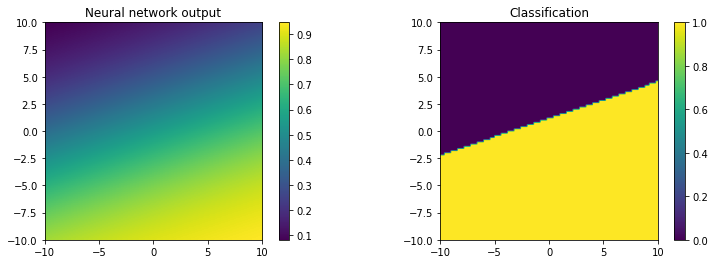

In [ ]:
NN = MultiLayerPerceptron()
A1 = DenseLayer(2, 1, Sigmoid(), seed=98)
NN.add(A1)
displayClassif(NN, -10, 10)

### Binary classification (2D)

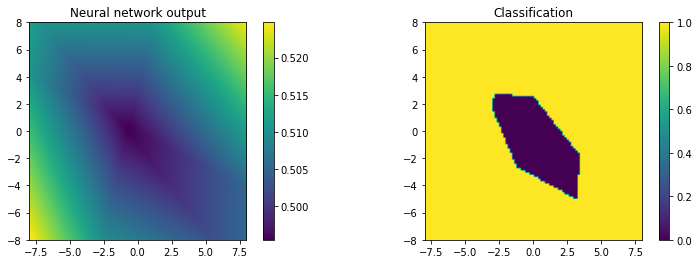

In [ ]:
Nhidden = 3
NN = MultiLayerPerceptron()

A1 = DenseLayer(2, Nhidden, ReLU(), seed=8, L=0.3)
A1.weights
NN.add(A1)
A2 = DenseLayer(Nhidden, 1, Sigmoid())
NN.add(A2)
x=np.random.rand(ninput, ndata)
NN.forward(x)
displayClassif(NN, -8, 8)

## II. Evaluating a Neural Network

In [ ]:
class Cost(ABC):
    def __init__(self):
        self.deriv = autograd.elementwise_grad(self.funct)

    @abstractmethod
    def funct(self,predict,real):
        pass
    
    def eval(self,predict,real):
        return np.sum(self.funct(predict, real))
    
    def eval_deriv(self,predict,real):
        return self.deriv(predict,real)

### Cost functions

The cost function between the true value $y^{(t)}$ and the predicted value (or predicted probability for classification) $f_\omega(x)$ is given by $$L(y^{(t)},y^{(p)})=\frac{1}{n}\sum_{i=1}^n l(y_i^{(t)},y_i^{(p)})$$


#### Mean Squared Error

This function is used for regression where the output vector $y^{(p)}$ is generally the linear term of the last layer (identity activation):

$$l(y^{(p)},y^{(t)}) = \frac{1}{2}(y_i^{(p)}-y_i^{(t)})^2$$

#### Gradient


$$\frac{\partial L}{\partial y_i^{(p)}}= y_i^{(p)}-y_i^{(t)}$$ 


In [ ]:
class MeanSquare():
    def eval(self, predict, real):
        # TODO: code here (replace the pass or None)
        pass
    
    def eval_deriv(self, predict, real):
        # TODO: code here (replace the pass or None)
        pass

#### Binary Cross-Entropy

This function is used for classification where the ouput vector $y^{(p)}$ is computed from the sigmoid function applied to the linear term of the last layer :

$$y^{(p)}_i = \frac{1}{1+e^{-s_i}}$$ 

$$L(y^{(p)},y^{(t)}) = -\sum_{i=1}^n \left(y_i^{(t)}\log(y_i^{(p)}) + (1-y_i^{(t)})\log(1-y_i^{(p)})\right)$$

#### Gradient

$$\frac{\partial L}{\partial y_i^{(p)}}= -\frac{y_i^{(t)}}{y_i^{(p)}}+\frac{1-y_i^{(t)}}{1-y_i^{(p)}}=\frac{y_i^{(p)}-y_i^{(t)}}{y_i^{(p)}  (1-y_i^{(p)})}$$ 

$$\frac{\partial L}{\partial s_i} = \frac{\partial L}{\partial y_i^{(p)}}\frac{\partial y_i^{(p)}}{\partial s_i} = 
y_i^{(p)}-y_i^{(t)}$$

In [ ]:
class BinaryCrossEntropy():
    def eval(self, predict, real):
        # TODO: code here (replace the pass or None)
        pass
    
    def eval_deriv(self, predict, real):
        # TODO: code here (replace the pass or None)
        pass

### Remark:

For multi-label classification, the cost-function is generally the cross entropy:


$$L(y^{(p)},y^{(t)}) =-\sum_{i=1}^n \sum_{k=1}^K \left({y_k}_i^{(t)}\log({y_k}_i^{(p)})\right)$$

where $y_k^{(p)}$ is the predicted probability vector for the class $k$ and $y_k^{(t)}$ is the indicator vector of the class $k$.

Used with the softmax activation function for the output layer, similar simplifications occur.

## III. Learning Algorithm for a Neural Network

### Gradient of the cost function with respect to the weights

### 1) Back-propagation

In [ ]:
def BackPropGeneric(NN, x, real, cost):
    predict = NN.forward(x)
    l = NN.layers[-1]
    # dCost/df(y) = dCost/df(y) * df(y)/dy
    # TODO: code here (replace the pass or None)
    E = None

    # Last layer -> first layer
    for il in reversed(range(len(NN.layers))):
        # Since y = Wx + b
        # dy/dW = x => dCost/dW = dCost/dy * dy/dW = dCost/dy * x
        # dy/db = 1 => dCost/db = dCost/dy * dy/db = dCost/dy
        # Weights and Bias gradients for hidden layer := dCost/doutput.T @ input.T
        # TODO: code here (replace the pass or None)
        l.grad = None

        if il > 0:
            # dy/dx = W => dCost/dW = dCost/dy * dy/dx = dCost/dy * W
            E = E @ l.weights[:, 1:]
            l = NN.layers[il-1]
            E = E * l.activation.eval_deriv(l.S).T

            
def BackProp(NN, x, real, cost):
    predict = NN.forward(x)
    E = (predict - real).T
    for il in reversed(range(len(NN.layers))):
        l = NN.layers[il]
        l.grad = E.T @ l.tildeV.T
        if il > 0:
            lp = NN.layers[il-1]
            E = (E @ l.weights[:,1:]) * lp.activation.eval_deriv(lp.S).T

###  2) Finite differences

In [ ]:
def FinDiff(NN, x, real, cost=MeanSquare, delta=1e-6):

    res = [ np.zeros( np.shape(l.weights) )  for l in NN.layers  ]

    for s, l in enumerate(NN.layers):
        for j in range(l.weights.shape[0]):
            for k in range(l.weights.shape[1]):
    
                W = l.weights
                W[j,k] = W[j,k] + delta
                predict1 = NN.forward(x)
            
                W[j,k] = W[j,k] - 2 * delta
                predict2 = NN.forward(x)
                res[s][j,k] = (cost.eval(predict1 , real )- cost.eval(predict2 , real )) / (2*delta)
                W[j,k] = W[j,k] + delta
    return res

### Comparison of the two approaches

In [ ]:
def testNN(ninput = 3, nhidden1 = 6, nhidden2 = 5, noutput = 1, ndata= 20, cost_function=MeanSquare, last_activation=Identity):

    x=np.random.rand(ninput, ndata)

    NNr = MultiLayerPerceptron()
    A1r = DenseLayer(ninput, nhidden1, Sigmoid(),seed=4)
    NNr.add(A1r)
    A2r = DenseLayer(nhidden1,nhidden2, Sigmoid())
    NNr.add(A2r)
    A3r = DenseLayer(nhidden2,noutput, last_activation())
    NNr.add(A3r)
    real = NNr.forward(x)
    
    NNr.init_weights()
    predict = NNr.forward(x)

    # TODO: code here (replace the pass or None)
    resb = None
    # TODO: code here (replace the pass or None)
    Gradientb = None

    nl=len(NNr.layers)
    for i in range(nl):
        plt.subplot(1,nl,i+1)
        u=resb[i]
        plt.scatter(resb[i], NNr.layers[i].grad)
        plt.plot((np.min(u), np.max(u)), (np.min(u), np.max(u)), c='r')




##### Test in the regression case

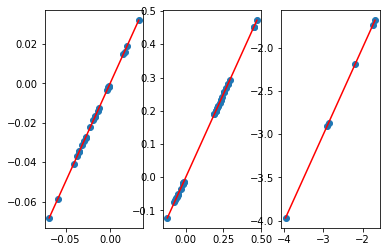

In [ ]:
testNN(cost_function=MeanSquare, last_activation=Identity)

##### Test in the classification case

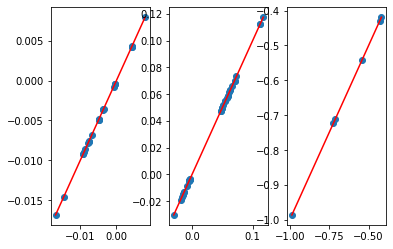

In [ ]:
testNN(cost_function=BinaryCrossEntropy, last_activation=Sigmoid)

### Neural network to approach a Gaussian random field realization

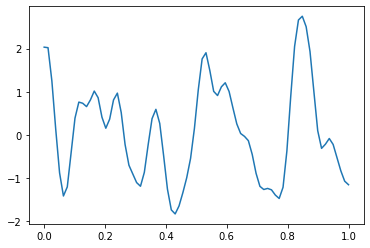

In [ ]:
x = np.linspace(0,1,80)
w=np.random.normal(0,1,size=len(x))
sigma = np.exp(-(np.abs(x[:, None] - x)/0.04)**2)
real = np.linalg.cholesky(sigma) @ w
plt.plot(x,real)


891970.9727511785
3.8929245691817194


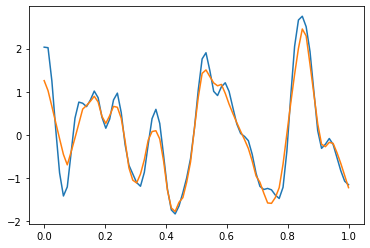

In [ ]:
plt.plot(x,real)
Nhidden = 1000
NN = MultiLayerPerceptron()
A1 = DenseLayer(1, Nhidden, ReLU(), seed=14, L=10)
NN.add(A1)
A2 = DenseLayer(Nhidden, 1, Identity(), L=10)
NN.add(A2)

predict = NN.forward(x)
print(MeanSquare().eval(predict, real))
#plt.plot(x,predict[0,:])

for epoch in range(200):
    indices = np.random.choice(range(x.shape[0]), x.shape[0], replace=False)
    for i in range(80):
        ind = indices[np.arange(1) + i * 1]
        # TODO: code here (replace the Nones)
        BackProp(NN, None, None, MeanSquare())
        for l in NN.layers:
            l.weights = l.weights -0.01/len(x) * l.grad
    

predict = NN.forward(x)
print(MeanSquare().eval(predict, real))
plt.plot(x, predict[0,:])


### 2D classification

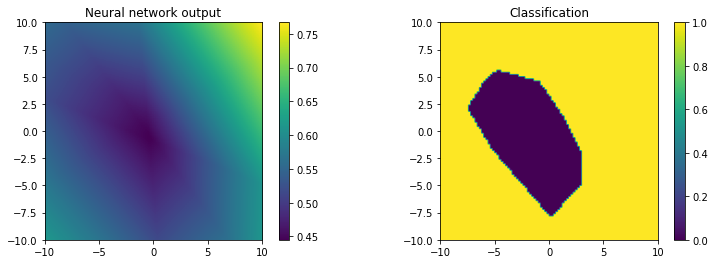

In [ ]:
NN = MultiLayerPerceptron()
Hidden = 5
A1 = DenseLayer(2, Hidden, ReLU(), seed=24, L=.5)
NN.add(A1)
A2 = DenseLayer(Hidden, 1, Sigmoid())
NN.add(A2)
displayClassif(NN, -10, 10)


In [ ]:
ndata = 200
x_train=-8 + 16 * np.random.uniform(0, 1, (2, ndata))
real = NN.forward(x_train)
real = (real > 0.5).astype(float)

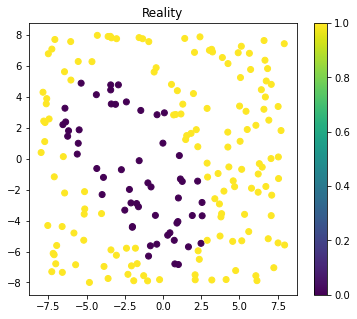

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 5), ncols=1)
pos = ax1.scatter(x_train[0,:], x_train[1,:], c=real)
fig.colorbar(pos, ax=ax1)
ax1.set_title("Reality")
plt.show()

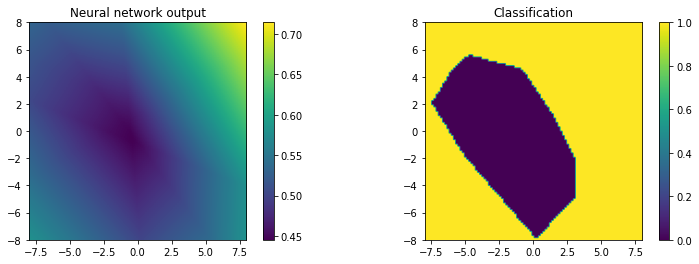

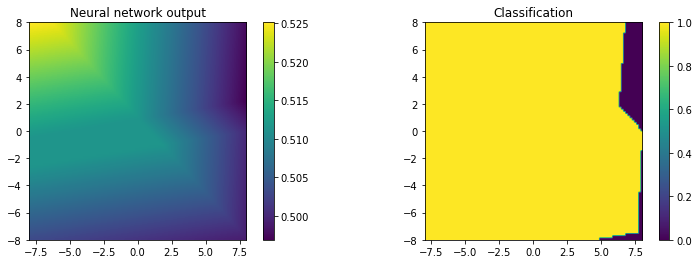

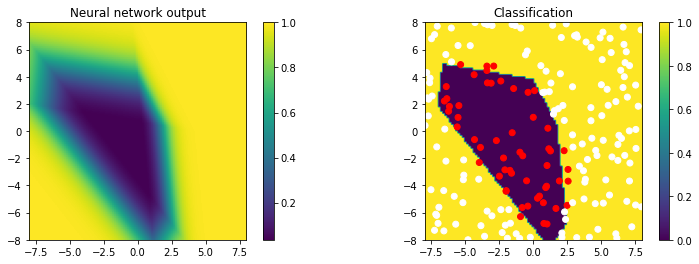

In [ ]:
displayClassif(NN,-8,8)
Nhidden = 3
NNfit = MultiLayerPerceptron()
A1 = DenseLayer(2, Nhidden, ReLU())
NNfit.add(A1)
A2 = DenseLayer(Nhidden, 1, Sigmoid(),L=0.1)
NNfit.add(A2)
displayClassif(NNfit,-8,8)

for epoch in range(10000):
    BackProp(NNfit, x_train, real,BinaryCrossEntropy())
    for l in NNfit.layers:
        l.weights = l.weights -0.01 / x_train.shape[1] * l.grad
    
displayClassif(NNfit, -8, 8, end=False)
plt.scatter(x_train[0,:], x_train[1,:], c=[['r','w'][i] for i in real[0].astype(int)])
plt.show()

### Representation of the hidden layer output and the last separating plane

In [ ]:
outputA1 = A1.forward(x_train)
output = NNfit.forward(x_train)
classif = (output > 0.5).astype(int)

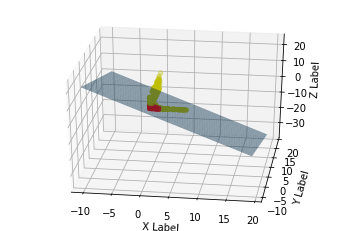

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


#%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



xs = outputA1[0,:]
ys = outputA1[1,:]
zs = outputA1[2,:]
ax.scatter(xs, ys, zs.astype(float), c=[['r','y'][i]  for i in classif[0]],zdir='y')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


weights = NNfit.layers[1].weights[0]

xx, yy = np.meshgrid(range(-10,20), range(-10,20))
z = (-weights[0] - weights[1]*xx - weights[2]*yy) / weights[3]

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)
ax.view_init(30, -82)
plt.show()



### To play 

https://playground.tensorflow.org/

In [ ]:
class SGD():
    
    def __init__(self, NN, learning_rate):
        self.NN=NN
        self.lr = learning_rate
    
    def update(self):
        for l in self.NN.layers:
            l.leights -= self.lr * l.grad
            
class Adam():
    
    def __init__(self,NN,learning_rate,beta1=0.9,beta2=0.999,eps = 0.0001):
        self.NN=NN
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = 0.00001
        self.momentum = []
        self.v = []
        self.it = 0
        for l in self.NN.Layers:
            self.momentum +=[np.zeros_like(l.Weights)]
            self.v +=[np.zeros_like(l.Weights)]
            
    def update(self):
        self.it += 1
        for il,l in enumerate(self.NN.Layers):
            self.momentum[il]=self.beta1 * self.momentum[il]+(1-self.beta1)*l.grad
            self.v[il]=self.beta2 * self.v[il] +(1-self.beta2)*l.grad**2
            hatm = self.momentum[il]/(1-self.beta1**self.it)
            hatv = self.v[il] /(1-self.beta2**self.it)
            l.Weights -= self.lr * hatm/(np.sqrt(hatv)+self.eps)
            
    

### Load and display the data

In [ ]:
import mnist
%matplotlib inline
images_train = np.array(mnist.train_images())
images_test = np.array(mnist.test_images())

digits_train = mnist.train_labels()
digits_test = mnist.test_labels()

print("shape of the data set ", images_train.shape)

shape of the data set  (60000, 28, 28)


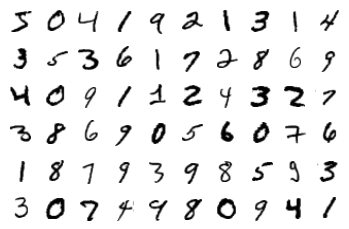

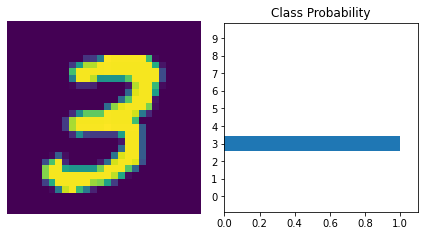

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(num_of_images):
    plt.subplot(6, 10, index+1)
    plt.axis('off')
    plt.imshow(images_train[index], cmap='gray_r')

index = 7
view_classify(images_train[index,:], np.identity(10)[digits_train[index], :])

### Transformations of the data

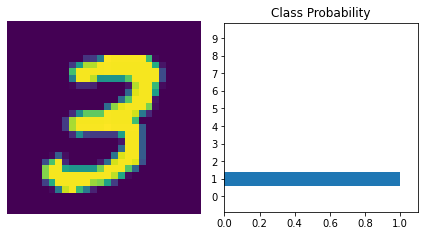

In [ ]:

x_train = images_train/255
x_test = images_test/255

Ninput = 28 *28
x_train = x_train.reshape([x_train.shape[0],Ninput]).T
x_test = x_test.reshape([x_test.shape[0],Ninput]).T



#Transform label to indicator (multi-class problem becomes binary class)

digit = 3

label_train = copy.copy(digits_train)
label_test = copy.copy(digits_test)

label_train[label_train!=digit]=10
label_train[label_train==digit]=1
label_train[label_train==10]=0

label_test[label_test!=digit]=10
label_test[label_test==digit]=1
label_test[label_test==10]=0


view_classify(images_train[index,:], np.identity(10)[label_train[index], :])


In [ ]:
def evaluateNN(NN, x, real, cost):
    predict = NN.forward(x)
    indic = predict[0,:]>0.5
    ind    = [i for i, x in enumerate(indic) if x]
    indneg = [i for i, x in enumerate(indic) if not x]
    sensitivity = sum(real[ind]==1) / sum(real)
    specificity = sum(real[indneg]==0)/ sum(1-real)
    costVal = cost.eval(predict,real) /x.shape[1]
    return costVal, sensitivity, specificity

In [ ]:
class displayResults():
    def __init__(self,NN,x_train,x_test,label_test,label_train,cost,display_step=10):
        self.N=1
        self.str = " "
        self.cost = cost
        self.display_step = display_step
        self.NN = NN
        self.label_test=label_test
        self.label_train = label_train
        self.x_test = x_test
        self.x_train = x_train
    def display(self,epoch):
        if epoch%self.display_step == 0 :
            if epoch % self.N ==0:
                self.str += " "
                self.N *=10
            costTrain,sensitTrain,specTrain = evaluateNN(self.NN,self.x_train,self.label_train,self.cost)
            costTest ,sensitTest ,specTest  = evaluateNN(self.NN,self.x_test ,self.label_test ,self.cost)
            print("Epoch {} - Training: Cost {:.4f} - Sensit: {:.4f} - Specic :{:.4f}".format(epoch,costTrain,sensitTrain,specTrain))
            print(self.str + "        Test:     Cost {:.4f} - Sensit: {:.4f} - Specic :{:.4f}".format(costTest,sensitTest,specTest))
        
        

### Creation of the neural network

In [ ]:
Nhidden = 10
NN = MultiLayerPerceptron()
A1 = DenseLayer(Ninput, Nhidden, ReLU(), seed=333, L=0.5)
NN.add(A1)
A2 = DenseLayer(Nhidden, 1, Sigmoid(),L=0.5)
NN.add(A2)

### Display initial weights

bias first layer [ 0.11  0.25 -0.25  0.24 -0.18  0.03  0.14  0.21 -0.16  0.07]
weights second layer [[ 0.05 -0.01  0.09  0.11  0.03 -0.23 -0.17 -0.06  0.25  0.04]]


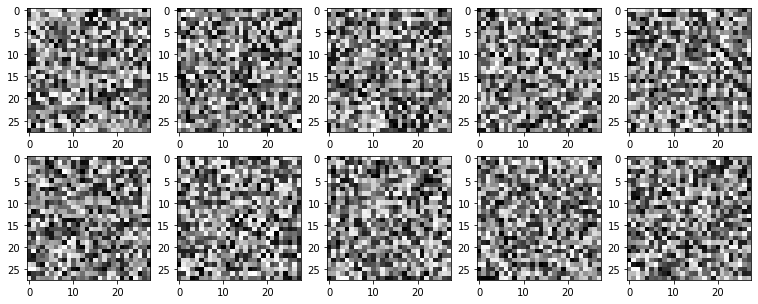

In [ ]:
nrd = 2
ncd = 5
u=NN.layers[0].weights[:,1:]
print("bias first layer",np.round(u[:,0],2))
plt.subplots(figsize=(13, 5), ncols=2)
for i in range(u.shape[0]):
    plt.subplot(nrd,ncd,i+1)
    plt.imshow(np.reshape(u[i,:],(28,28)), cmap='gray_r')
print("weights second layer",np.round(NN.layers[1].weights[:,1:],2))

### Algorithm parameters

In [ ]:
cost = BinaryCrossEntropy()

#optimizer = SGD(NN,0.00001)

optimizer = Adam(NN, 0.0005)

#Batch handling

batch_size = 10
n_batch = x_train.shape[1]//batch_size

# Number of epochs 

n_epochs = 20

#Display class (observer)

display_step = 1
displ = displayResults(NN,x_train,x_test,label_test,label_train,cost,display_step)

### Training loop

In [ ]:
for epoch in range(n_epochs):
    
    #Monitor results
    
    displ.display(epoch)

    #Shuffle the indices
    indices = np.random.choice(range(x_train.shape[1]),x_train.shape[1],replace=False)
    for i in range(n_batch):
        ind = indices[np.arange(batch_size)+i*batch_size]
        BackProp(NN,x_train[:,ind],label_train[ind],cost)
        optimizer.update()

print("End of training")       

Epoch 0 - Training: Cost 0.6955 - Sensit: 0.5415 - Specic :0.5289
          Test:     Cost 0.6938 - Sensit: 0.5347 - Specic :0.5367
Epoch 1 - Training: Cost 0.0972 - Sensit: 0.7919 - Specic :0.9900
          Test:     Cost 0.0873 - Sensit: 0.8198 - Specic :0.9912
Epoch 2 - Training: Cost 0.0828 - Sensit: 0.8315 - Specic :0.9911
          Test:     Cost 0.0747 - Sensit: 0.8564 - Specic :0.9920
Epoch 3 - Training: Cost 0.0727 - Sensit: 0.8514 - Specic :0.9929
          Test:     Cost 0.0664 - Sensit: 0.8743 - Specic :0.9923
Epoch 4 - Training: Cost 0.0652 - Sensit: 0.8777 - Specic :0.9927
          Test:     Cost 0.0603 - Sensit: 0.8941 - Specic :0.9922
Epoch 5 - Training: Cost 0.0586 - Sensit: 0.8800 - Specic :0.9943
          Test:     Cost 0.0547 - Sensit: 0.8970 - Specic :0.9939
Epoch 6 - Training: Cost 0.0533 - Sensit: 0.8906 - Specic :0.9948
          Test:     Cost 0.0496 - Sensit: 0.9059 - Specic :0.9945
Epoch 7 - Training: Cost 0.0486 - Sensit: 0.8971 - Specic :0.9956
          

### Prediction value for the false negative

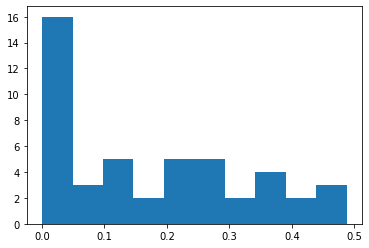

In [ ]:
x = x_test
real = label_test
digits = digits_test
predict=NN.forward(x)[0,:]
negative = predict<0.5
indicpos =  real==1
plt.hist(predict[negative&indicpos])
plt.show()

3

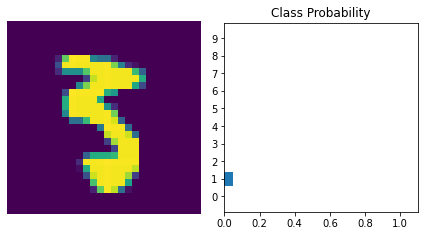

In [ ]:
strongly_negative = predict<0.05
ind = 3
num = [i for i,u in enumerate(strongly_negative & indicpos) if u][ind]
view_classify(x[:,num],predict[num]*np.identity(10)[real[num],:])
digits[num]

### Prediction value for the false positive

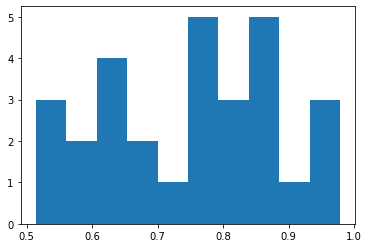

In [ ]:
positive = predict>0.5
indic =  real ==0
plt.hist(predict[positive&indic])
plt.show()

2

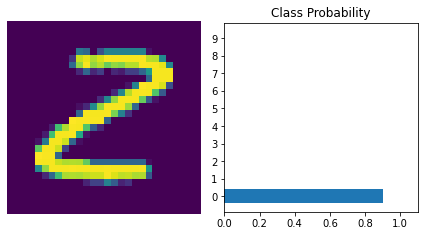

In [ ]:
strongly_positive = predict>0.9
ind = 1
num = [i for i,u in enumerate(strongly_positive & indic) if u][ind]
view_classify(x[:,num],predict[num]*np.identity(10)[real[num],:])
digits[num]

### Display weights after training

bias first layer [ 0.11  0.25 -0.25  0.24 -0.18  0.03  0.14  0.21 -0.16  0.07]
weights second layer [[ 0.69 -0.62  1.05  0.96  0.71 -0.69 -1.34 -0.47  0.2  -0.86]]


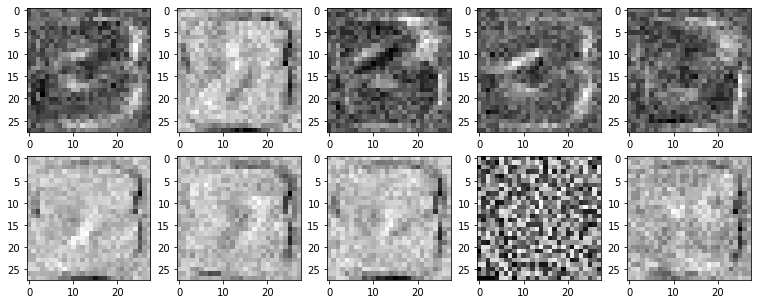

In [ ]:
u = NN.layers[0].weights[:,1:]
print("bias first layer",np.round(u[:,0],2))

plt.subplots(figsize=(13, 5), ncols=2)
for i in range(u.shape[0]):
    plt.subplot(nrd,ncd,i+1)
    plt.imshow(np.reshape(u[i,:],(28,28)), cmap='gray_r')

print("weights second layer",np.round(NN.layers[1].weights[:,1:],2))

### Glossary

numpy.atleast_2d

In [ ]:
x= np.array([3,1])
print(x)
print(x.shape)
y = np.atleast_2d(x)
print(y)
print(y.shape)

[3 1]
(2,)
[[3 1]]
(1, 2)


### Miscellaneous

Regression problem with ADAM

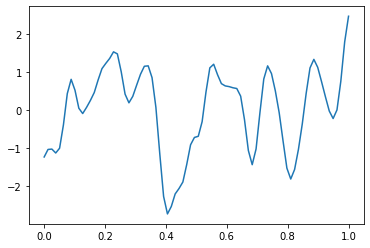

In [ ]:
x = np.linspace(0,1,80)
w=np.random.normal(0,1,size=len(x))
sigma = np.exp(-(np.abs(x[:, None] - x)/0.04)**2)
real = np.linalg.cholesky(sigma) @ w
plt.plot(x,real)

892229.4798876474
End of training
2.9392758506866192


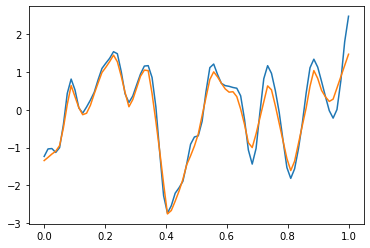

In [ ]:
plt.plot(x,real)
Nhidden = 1000
NN = MultiLayerPerceptron()
A1 = DenseLayer(1,Nhidden,ReLU(), seed=14, L=10)
NN.add(A1)
A2 = DenseLayer(Nhidden, 1, Identity(), L=10)
NN.add(A2)


predict = NN.forward(x)
print(MeanSquare().eval(predict, real))
#plt.plot(x,predict[0,:])

    

cost = MeanSquare()

optimizer = Adam(NN,0.0001)

batch_size = 1
n_batch = x.shape[0] // batch_size


for epoch in range(1000):
   
    #Shuffle the indices
    indices = np.random.choice(range(x.shape[0]), x.shape[0], replace=False)
    for i in range(n_batch):
        ind = indices[np.arange(batch_size) + i * batch_size]
        BackProp(NN,x[ind], real[ind], cost)
        optimizer.update()

print("End of training")       

predict = NN.forward(x)
print(MeanSquare().eval(predict,real))
plt.plot(x, predict[0,:])